## Handling Nan Values


In [1]:
import datetime as dt
import yfinance as yf
import pandas as pd

stocks = ["AMZN","MSFT","INFY.NS","GOOG"]
adani_stocks = ["ADANIENT.NS", "ADANIPORTS.NS", "ADANIPOWER.NS", "ADANIGREEN.NS", "ADANIPORTS.NS" ]
start = dt.datetime.today()-dt.timedelta(60)
end = dt.datetime.today()
cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock

# looping over tickers and creating a dataframe with close prices
for ticker in adani_stocks:
    cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
    
# filling NaN values
cl_price.fillna(method='bfill',axis=0,inplace=True) # We are using bfill because it won't have any effect in our backtesting section.  
# For example, if all the first 10 Nan values are filled with 69, the net return for every day would be 0. Thus, this won't create any problem for us. 

#dropping NaN values
cl_price.dropna(axis=0,how='any')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,ADANIENT.NS,ADANIPORTS.NS,ADANIPOWER.NS,ADANIGREEN.NS
Date,,,,
2022-12-12,4016.699951,881.299988,310.200012,2024.050049
2022-12-13,4060.199951,894.799988,323.000000,2021.400024
2022-12-14,4055.800049,900.549988,319.350006,2018.150024
2022-12-15,4043.750000,883.950012,315.450012,2024.900024
2022-12-16,3980.800049,860.450012,307.899994,2044.250000
2022-12-19,4075.300049,892.849976,305.799988,2062.050049
2022-12-20,4165.299805,884.250000,305.750000,2061.649902
2022-12-21,3901.949951,857.650024,290.500000,1968.250000
2022-12-22,3868.550049,856.900024,276.000000,1980.750000


Here we choose to bfill the nan values because doing so will have no effect on our backtesting code as the daily returns for those values will always be 0 and won't affect our backtesting model.


## OHLCV data and perform basic data operations

In [2]:
import datetime as dt
import yfinance as yf
import pandas as pd

tickers = ["AMZN","MSFT","BHEL.NS","GOOG"]
start = dt.datetime.today()-dt.timedelta(60)
end = dt.datetime.today()
cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock

# looping over tickers and creating a dataframe with close prices
for ticker in adani_stocks:
    cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
    
#dropping NaN values
cl_price.dropna(axis=0,how='any',inplace=True)

#familiarizing with data
cl_price.head(8) #prints the first 8 rows of the dataframe
cl_price.tail() #prints the last 5 rows of the dataframe
cl_price.describe() #performs summary statistic of each numerical columns in the datafrme

# Mean, Median, Standard Deviation
cl_price.mean() #calculates mean stock price for each stock
cl_price.median() #calculates median stock price for each stock
cl_price.std() #calculates standard deviation of stock price for each stock

# Return calculation
daily_return = cl_price.pct_change() #Creates dataframe with daily return for each stock
daily_return = cl_price/cl_price.shift(1) - 1 #Performs same operation as above

daily_return.mean(axis=1) #prints mean daily return for each stock
daily_return.std() #prints standard deviation of daily returns for each stock

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ADANIENT.NS      0.074144
ADANIPORTS.NS    0.049310
ADANIPOWER.NS    0.030888
ADANIGREEN.NS    0.056331
dtype: float64

In [3]:
daily_return["ADANIENT.NS"].tail(20) * 100

Date
2023-01-10    -5.405549
2023-01-11    -0.304364
2023-01-12     0.313546
2023-01-13     2.027581
2023-01-16    -2.723617
2023-01-17     0.540086
2023-01-18    -1.171917
2023-01-19    -3.702002
2023-01-20    -0.213658
2023-01-23    -0.572886
2023-01-24     0.164416
2023-01-25    -1.541257
2023-01-27   -18.516060
2023-01-30     4.758375
2023-01-31     2.801728
2023-02-01   -28.196975
2023-02-02   -26.698203
2023-02-03     1.376780
2023-02-06    -0.888587
2023-02-07    14.640428
Name: ADANIENT.NS, dtype: float64

## OHLCV data and perform rolling operations

In [4]:

import datetime as dt
import yfinance as yf
import pandas as pd

tickers = ["AMZN","MSFT","BHEL.NS","GOOG"]

start = dt.datetime.today()-dt.timedelta(60)
end = dt.datetime.today()
cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock

# looping over tickers and creating a dataframe with close prices
for ticker in adani_stocks:
    cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
    
#dropping NaN values
cl_price.dropna(axis=0,how='any',inplace=True)

# Return calculation
daily_return = cl_price.pct_change() #Creates dataframe with daily return for each stock
daily_return.mean(axis=1) #prints mean daily return for each stock
daily_return.std() #prints standard deviation of daily returns for each stock

# Rolling operations (simple)
daily_return.rolling(window=10).mean()
daily_return.rolling(window=10).std()
daily_return.rolling(window=10).max()
daily_return.rolling(window=10).sum()

# Rolling operations (exponentialy weighted)
daily_return.ewm(com=10, min_periods=10).mean()
daily_return.ewm(com=10, min_periods=10).std()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,ADANIENT.NS,ADANIPORTS.NS,ADANIPOWER.NS,ADANIGREEN.NS
Date,,,,
2022-12-12,NaN,NaN,NaN,NaN
2022-12-13,NaN,NaN,NaN,NaN
2022-12-14,NaN,NaN,NaN,NaN
2022-12-15,NaN,NaN,NaN,NaN
2022-12-16,NaN,NaN,NaN,NaN
2022-12-19,NaN,NaN,NaN,NaN
2022-12-20,NaN,NaN,NaN,NaN
2022-12-21,NaN,NaN,NaN,NaN
2022-12-22,NaN,NaN,NaN,NaN


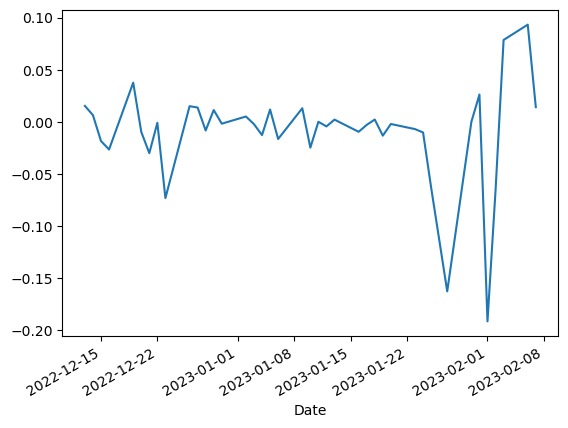

In [5]:
daily_return["ADANIPORTS.NS"].plot();

In [6]:
daily_return["ADANIPORTS.NS"].ewm(com=10, min_periods=10).mean().tail(20) * 100

Date
2023-01-10   -0.465098
2023-01-11   -0.416244
2023-01-12   -0.418619
2023-01-13   -0.354570
2023-01-16   -0.414845
2023-01-17   -0.402677
2023-01-18   -0.341100
2023-01-19   -0.437569
2023-01-20   -0.415117
2023-01-23   -0.442327
2023-01-24   -0.497800
2023-01-25   -1.052680
2023-01-27   -2.500589
2023-01-30   -2.263210
2023-01-31   -1.802766
2023-02-01   -3.435231
2023-02-02   -3.732034
2023-02-03   -2.648226
2023-02-06   -1.531101
2023-02-07   -1.257531
Name: ADANIPORTS.NS, dtype: float64

## Import OHLCV data and perform basic visualizations

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<AxesSubplot:title={'center':'Stock Price Evolution'}, xlabel='Date'>

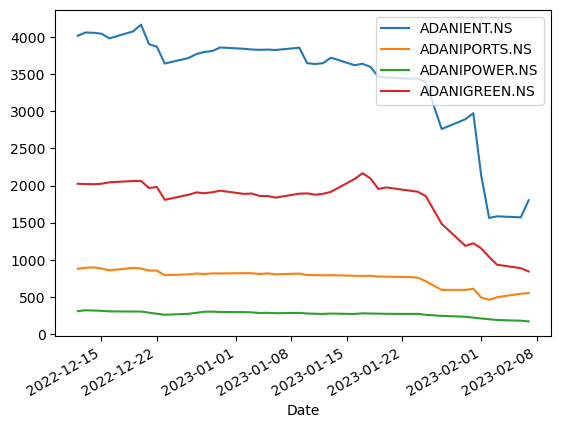

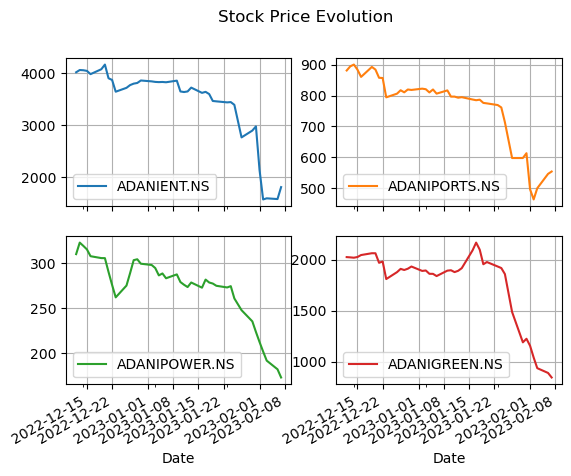

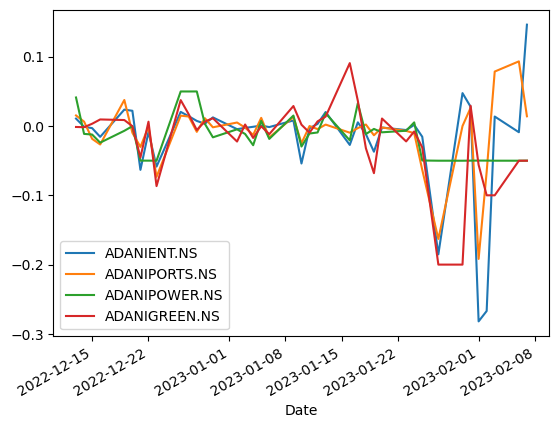

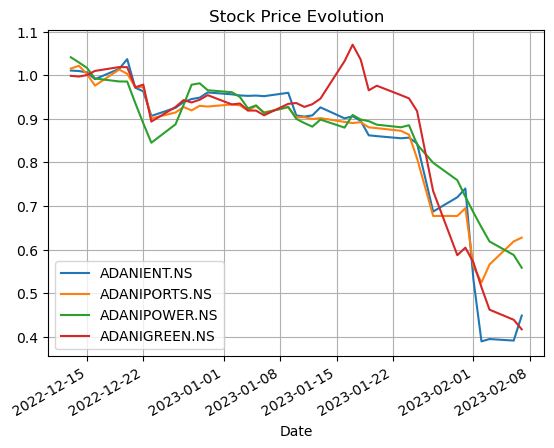

In [7]:
import datetime as dt
import yfinance as yf
import pandas as pd

tickers = ["AMZN","MSFT","BHEL.NS","GOOG"]
start = dt.datetime.today()-dt.timedelta(60)
end = dt.datetime.today()
cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock

# looping over tickers and creating a dataframe with close prices
for ticker in adani_stocks:
    cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
    
#dropping NaN values
cl_price.dropna(axis=0,how='any',inplace=True)

# Return calculation
daily_return = cl_price.pct_change() #Creates dataframe with daily return for each stock
  
#plotting close prices
cl_price.plot() 
cl_price.plot(subplots=True, layout = (2,2), title = "Stock Price Evolution", grid =True) # Subplots of the stocks
  
#plotting daily returns and cumulative returns    
daily_return.plot()
(1+daily_return).cumprod().plot(title = "Stock Price Evolution", grid =True)    
# cumprod is what we call running product in our leetcode problems 
    
    
    
    
    
    

## Import OHLCV data and perform visualizations using pyplot module

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


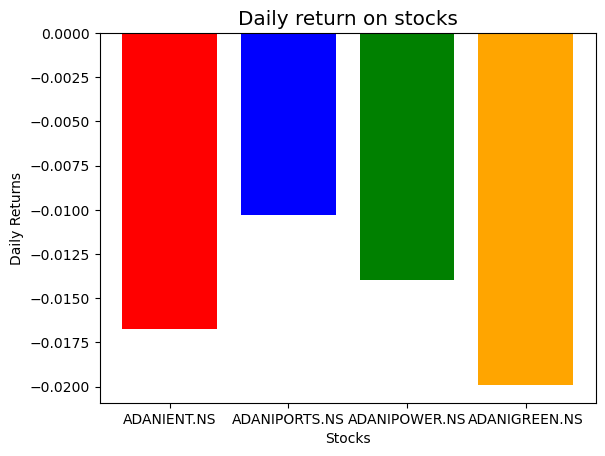

In [8]:
import datetime as dt
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

tickers = ["AMZN","MSFT","BHEL.NS","GOOG"]
start = dt.datetime.today()-dt.timedelta(60)
end = dt.datetime.today()
cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock

# looping over tickers and creating a dataframe with close prices
for ticker in adani_stocks:
    cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
    
#dropping NaN values
cl_price.dropna(axis=0,how='any',inplace=True)

# Return calculation
daily_return = cl_price.pct_change() #Creates dataframe with daily return for each stock
 
# Pyplot demo
fig, ax = plt.subplots()
plt.style.available
plt.style.use('ggplot')
ax.set(title="Daily return on stocks", xlabel="Stocks", ylabel = "Daily Returns")
plt.bar(daily_return.columns,daily_return.mean(),color=["red","blue","green","orange"]);


Lets see what would be the current value of investing 1 rupee on 2022-12-08 in the following stocks

In [9]:
(1 + daily_return).cumprod().tail(1).round(2)

,ADANIENT.NS,ADANIPORTS.NS,ADANIPOWER.NS,ADANIGREEN.NS
Date,,,,
2023-02-07,0.45,0.63,0.56,0.42


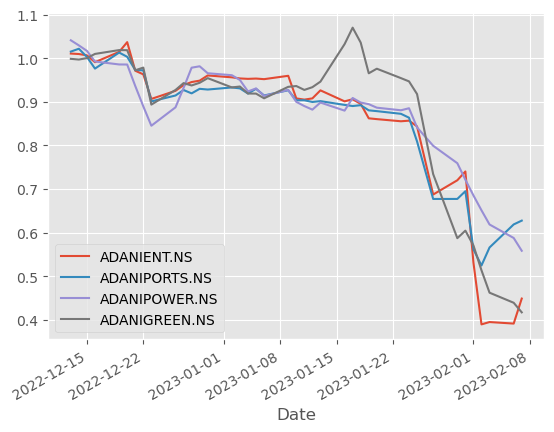

In [10]:
(1 + daily_return).cumprod().plot();